# 00. Visualizing Gradient Descent

## Visualizing Gradient Descent

According to Wikipedia:

> Gradient descent is a first-order iterative optimization algorithm for
> finding a local minimum of a differentiable function.

But I would go with:

> Gradient descent is an iterative technique commonly used in machine
> learning and deep learning to find the best possible set of parameters
> / coefficients for a given model, data points, and loss function,
> starting from an initial, and usually random, guess.

If you really understand how gradient descent works, you will also
understand how the characteristics of your data and your choice of
hyper-parameters (mini-batch size and learning rate, for instance) have
an impact on how well and how fast the model training is going to be.

By really understanding, I do not mean working through the equations
manually: this does not develop intuition either. I mean visualizing the
effects of different settings; I mean telling a story to illustrate the
concept. That’s how you develop intuition.

## Model

A linear regression with a single feature, $x$:

$$y = b + wx + \epsilon$$

In this model, we use a feature (x) to try to predict the value of a
label (y). There are three elements in our model:

-   $b$ : the bias (or intercept), which tells us the expected average
    value of y when x is zero
-   $w$ : the weight (or slope), which tells us how much y increases, on
    average, if we increase x by one unit
-   $\epsilon$ : which is there to account for the inherent noise; that
    is, the error we cannot get rid of

## Data Generation

### Create Synthetic Data

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
true_b = 1
true_w = 2
N = 100

np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (0.1 * np.random.randn(N, 1))

y = true_b + true_w * x + epsilon

### Split data as train-valid-test

In [3]:
# shuffle indices
idx = np.arange(N)
np.random.shuffle(idx)

# use the first 80 for training, and the rest for validation
train_idx = idx[:int(N*0.8)]
val_idx = idx[int(N*0.8):]

# create train and valid data sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val= x[val_idx], y[val_idx]

Plot the data using plots.chapter0

(<Figure size 1152x576 with 2 Axes>,
 array([<Axes: title={'center': 'Generated Data - Train'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': 'Generated Data - Validation'}, xlabel='x', ylabel='y'>],
       dtype=object))

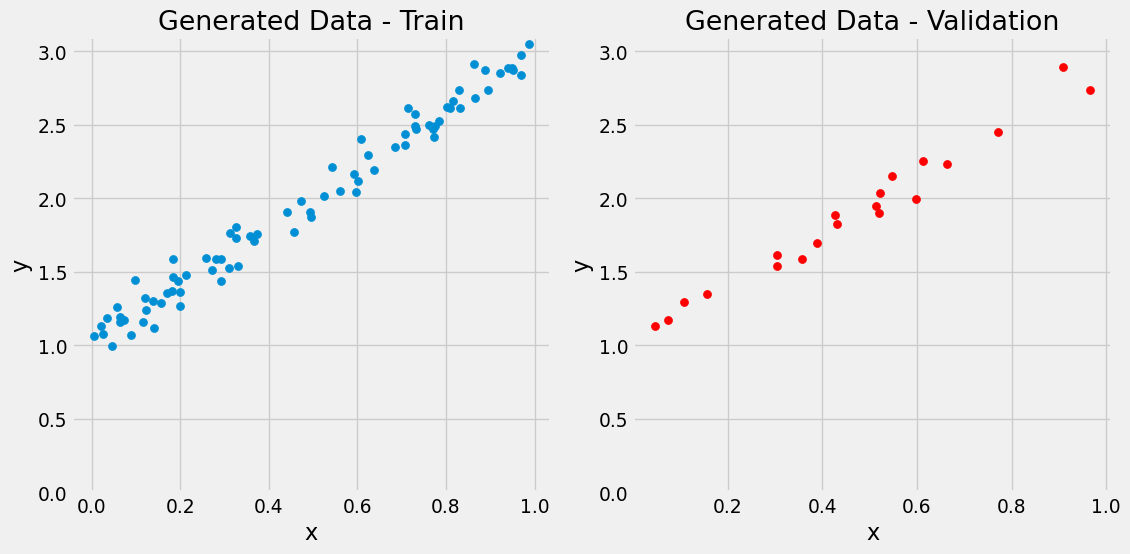

In [4]:
from config import *
from plots.chapter0 import *

figure1(x_train, y_train, x_val, y_val)

Plot the data using plotly.

In [5]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig1 = make_subplots(
    rows=1, cols=2, 
    subplot_titles=("Training Data","Validation Data")
)

fig1.add_trace(
    go.Scatter(
        x = x_train[:, 0], 
        y = y_train[:, 0], 
        mode='markers'
    ), 
    row=1, col=1, 
)

fig1.add_trace(
    go.Scatter(
        x = x_val[:, 0], 
        y = y_val[:, 0], 
        mode='markers'
    ), 
    row=1, col=2, 
)

fig1.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50
    ),
)

fig1.show()

fig1.write_image("images/fig_00_01.svg")

## Step 0 - Random Initialization

To train a model, need to **randomly initialize the
parameters/weights**.

In [6]:
# randomly init param: b & w
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print('b:\t', b)
print('w:\t', w)

b:   [0.49671415]
w:   [-0.1382643]

## Step 1 - Compute Models’ Predictions

This is the **forward pass**, which computes the *model’s prediction*
using the randomly initalized parameters.

In [7]:
yhat = b + w * x_train

(<Figure size 576x576 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

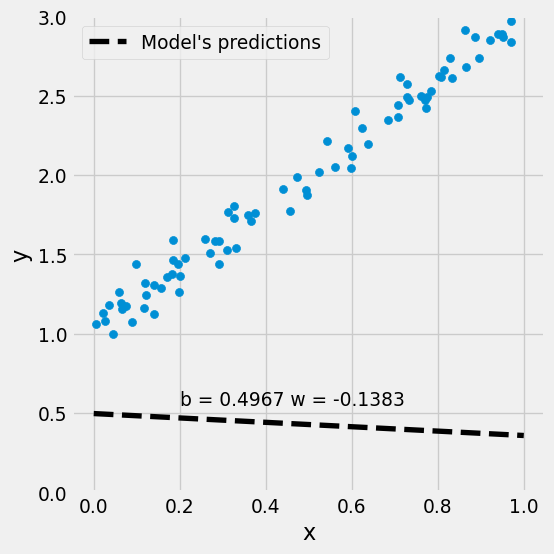

In [8]:
figure2(x_train, y_train, b, w)

Or, plot using `plotly`.

In [9]:
import plotly.graph_objects as go

fig2a = go.Figure()

fig2a.add_trace(go.Scatter(
    x = x_train[:, 0], 
    y = y_train[:, 0], 
    mode='markers'
    ), 
)

# add trace of the trendline 
fig2a.add_trace(go.Scatter(
        x = x_train[:, 0], 
        y = yhat[:, 0], 
        mode='lines+text', 
        line={
            'dash': 'solid',
            'color': 'red',
            'width': 3,
        }, 
        name='y = ' + str(b.round(3).item()) + ' + ' + str(w.round(3).item()) + 'x',  
    ), 
)

fig2a.update_layout(
    autosize=False,
    width=650,
    height=500,
    margin=dict(
        l=50,
        r=200,
        b=50,
        t=50,
        # pad=20
    ),
)

fig2a.show()

fig2a.write_image("images/fig_00_02a.svg")

In [10]:
import plotly.express as px 
import plotly.graph_objects as go

fig2b = px.scatter(
    x         = x_train[:, 0],
    y         = y_train[:, 0],
    trendline = 'ols',
)

model = px.get_trendline_results(fig2b)
alpha = model.iloc[0]["px_fit_results"].params[0]
beta = model.iloc[0]["px_fit_results"].params[1]

fig2b.data[0].name = 'observations'
fig2b.data[0].showlegend = True
fig2b.data[1].name = (
    fig2b.data[1].name  + ' y = ' + str(round(alpha, 2)) + ' + ' + str(round(beta, 2)) + 'x'
)
fig2b.data[1].showlegend = True

fig_2nd_trendline = go.Scatter(
    x = x_train[:, 0], 
    y = yhat[:, 0], 
    mode='lines+text', 
    line={
        'dash': 'solid',
        'color': 'red',
        'width': 3,
    }, 
    name=(
        'yhat = ' + str(b.round(3).item()) + ' + ' + str(w.round(3).item()) + 'x'
    ),  
)

fig2b.add_trace(fig_2nd_trendline)

fig2b.update_layout(
    autosize=False,
    width=650,
    height=500,
    margin=dict(
        l=50,
        r=200,
        b=50,
        t=50,
        # pad=20
    ),
)

fig2b.show()

fig2b.write_image("images/fig_00_02b.svg")

## Step 2 - Compute the Loss

**Error**: the *data-point-wise difference* btw the **actual value
(label)** and the **predicted value**.

$$
error_i = \hat{y_i} - y_i
$$

**Loss** : aggregation of the errors for a set of data points.

For regression problem, the loss is calcuated by **Mean Sqaured Error
(MSE)**, i.e. the average of the squared errors.

$$
\begin{align*}
MSE 
&= \frac{1}{n} \displaystyle\sum_{i=1}^n error_i^2 \\
&= \frac{1}{n} \displaystyle\sum_{i=1}^n (\hat{y_i} - y_i)^2 \\
&= \frac{1}{n} \displaystyle\sum_{i=1}^n (b + wx_i - y_i)^2 \\
\end{align*}
$$

### Using batch, mini-batch, stochastic gradient descent to calculate the loss

-   **Batch gradient descent**: Use all data points in the training set.
-   **Mini-batch gradient descent**: Use one chunck of data points at a
    time.
-   **Stochastic gradient descent**: Use only one data point ata a time.

In [11]:
# step 2: compute the loss use all data points, i.e. batch gradient descent
error = (yhat - y_train)
loss = (error ** 2).mean()
print('loss of batch gradient descent:\t', loss)

loss of batch gradient descent:  2.7421577700550976

### Loss Surface

**Loss surface**: the surface of the loss function, i.e. the surface in
a high-dimensional space, defined by all possible combinations of the
parameters of the loss function and the corresponding loss value.

For a loss function with two paramerters, the loss surface is a one in a
3-dimentional space, defined by all combinations of the two parameters
and their corresponding loss value.

In [12]:
# visualize the loss surface

# create a series of 100 evenly spaced values within a range for both parameters thatis centered around their respective true values.
num_rows = 100
num_cols = 100 

b_val_range = [true_b - 3, true_b + 3]
w_val_range = [true_w - 3, true_w + 3]

# create a range of w and b 
b_range = np.linspace(b_val_range[0], b_val_range[1], num_rows+1)
w_range = np.linspace(w_val_range[0], w_val_range[1], num_cols+1)

print(
    'b_range type:\t', type(b_range), '\n',
    'b_range shape:\t', b_range.shape, '\n'
)
print(
    'w_range type:\t', type(w_range), '\n',
    'w_range shape:\t', w_range.shape, '\n'
)

# use the meshgid() in numpy to create a grid of b & w for all their combinations
bs, ws = np.meshgrid(b_range, w_range)
print('bs shape:\t', bs.shape)
print('ws shape:\t', ws.shape)

b_range type:    <class 'numpy.ndarray'> 
 b_range shape:  (101,) 

w_range type:    <class 'numpy.ndarray'> 
 w_range shape:  (101,) 

bs shape:    (101, 101)
ws shape:    (101, 101)

In [13]:
bs 

array([[-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       ...,
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ]])

In [14]:
ws 

array([[-1.  , -1.  , -1.  , ..., -1.  , -1.  , -1.  ],
       [-0.94, -0.94, -0.94, ..., -0.94, -0.94, -0.94],
       [-0.88, -0.88, -0.88, ..., -0.88, -0.88, -0.88],
       ...,
       [ 4.88,  4.88,  4.88, ...,  4.88,  4.88,  4.88],
       [ 4.94,  4.94,  4.94, ...,  4.94,  4.94,  4.94],
       [ 5.  ,  5.  ,  5.  , ...,  5.  ,  5.  ,  5.  ]])

In [15]:
# calculate prediction, errors, and loss for a single input data point, using all the combinations of b & w generated above
dummy_x = x_train[0]
dummy_yhat = bs + ws * dummy_x

print('dummy_yhab shape:\t', dummy_yhat.shape)

dummy_yhab shape:    (101, 101)

In [16]:
all_predictions = np.apply_along_axis(
    func1d = lambda x: bs + ws * x,
    axis   = 1,
    arr    = x_train,
)

print('all_predictions shape:\t', all_predictions.shape)

all_predictions shape:   (80, 101, 101)

In [17]:
# reshape the 1D vector of all labels to a rank-3 tensor matching the shape of all_predictions
all_labels = y_train.reshape(-1, 1, 1)

print('all_labels shape:\t', all_labels.shape)

all_labels shape:    (80, 1, 1)

In [18]:
all_errors = ( all_predictions - all_labels  )

print('all_errors shape:\t', all_errors.shape)

all_errors shape:    (80, 101, 101)

In [19]:
all_losses = ( all_errors ** 2 ).mean(axis=0)

print('all_losses shape:\t', all_losses.shape)

all_losses shape:    (101, 101)

(<Figure size 1152x576 with 2 Axes>,
 (<Axes3D: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>,
  <Axes: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>))

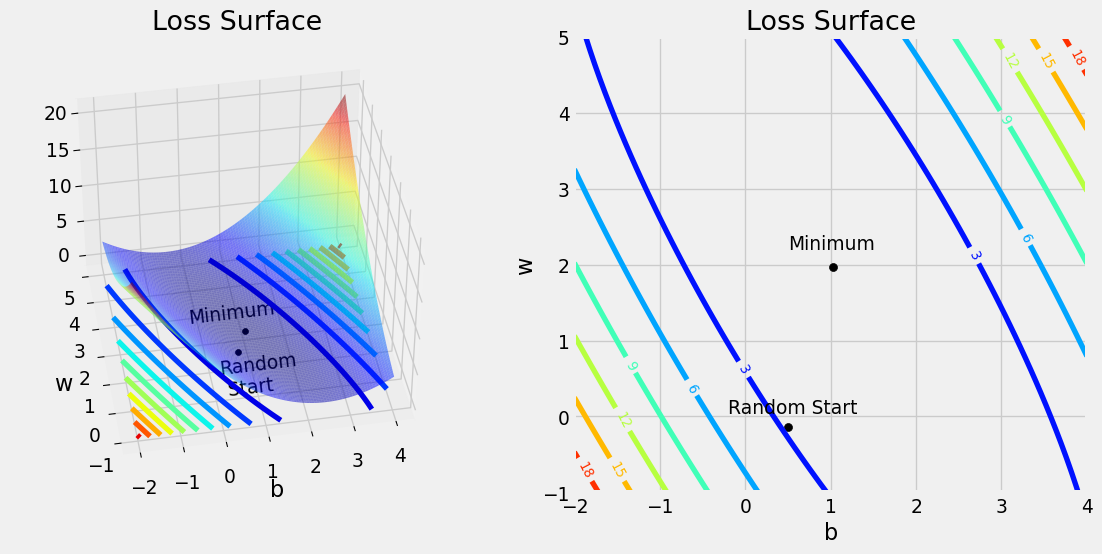

In [20]:
figure4(x_train, y_train, b, w, bs, ws, all_losses)

Plot the loss surface using plotly.

In [21]:
import plotly.graph_objects as go 

fig_loss_surf = go.Figure(
    data=[go.Surface(
        x=b_range, 
        y=w_range,
        z=all_losses,
    )]
) 

fig_loss_surf.update_traces(
    contours_x = dict(
        show=True, 
        usecolormap=True, 
        highlightcolor="red", 
        project_x=True, 
    ),
    contours_y = dict(
        show=True, 
        usecolormap=True, 
        highlightcolor="green", 
        project_y=True, 
    ), 
    contours_z = dict(
        show=True, 
        usecolormap=True, 
        highlightcolor="blue", 
        project_z=True, 
    )
)

fig_loss_surf.update_layout(
    title="Loss Surface",
    autosize=False, 
    width=800, 
    height=800,
    scene= dict(
        xaxis = dict(
            nticks=11,
            range=[b_val_range[1], b_val_range[0]],
            title_text='b'
        ),
        yaxis = dict(
            nticks=11,
            range=[w_val_range[1], w_val_range[0]],
            title_text='w'
        ),
        zaxis = dict(nticks=11, title_text='loss'), 
    ), 
    scene_aspectmode='cube', 
    # margin=dict(
    #     l=100,
    #     r=100,
    #     b=100,
    #     t=100,
    #     # pad=20
    # ),
    
)

fig_loss_surf.show()

fig_loss_surf.write_image("images/fig_00_04_loss_surface.svg")

In [22]:
fig_contour = go.Figure(data=[go.Contour(
    x=b_range, 
    y=w_range,
    z=all_losses,
    contours=dict(
        coloring = 'heatmap', 
        showlabels = True,
        labelfont = dict(
            size=10, 
            color='white', 
        ), 
    ), 
    # contours_coloring='lines', # uncomment to show lines only
    line_width=2, 
    ncontours=30,  
)]) 

fig_contour.update_layout(
    title="Loss Surface Contour",
    autosize=False, 
    width=600, 
    height=600,
    # scene= dict(
    #     xaxis = dict(nticks=11, range=[b_val_range[1], b_val_range[0]], title_text='b'),
    #     yaxis = dict(nticks=11, range=[w_val_range[1], w_val_range[0]], title_text='w'),
    #     zaxis = dict(nticks=11, title_text='loss'), 
    # ), 
    scene_aspectmode='cube', 
)

fig_pt = go.Scatter(
    x = b, 
    y = w, 
    marker=dict(
        color='red',
        size=10,
        line=dict(color='yellow', width=2),
    ), 
    text='randomly generated b & w', 
)

fig_contour.add_trace(fig_pt)

fig_contour.show()
fig_contour.write_image("images/fig_00_04_contour.svg")